In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# import math lib
from math import pi

# import Qiskit
from qiskit import Aer, IBMQ, execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

In [3]:
# To use local qasm simulator
backend = Aer.get_backend('qasm_simulator')

In [4]:
def get_theta(d):
    x = d[0]
    y = d[1]
    
    theta = 2*math.acos((x+y)/2.0)
    return theta

In [5]:
def get_data(n,k,std):
    data = make_blobs(n_samples=n, n_features=2, centers=k, cluster_std=std, random_state=100)
    points = data[0]
    centers = data[1]
    
    return points,centers

In [6]:
def get_Distance(x,y):
    theta_1 = get_theta(x)
    theta_2 = get_theta(y)
    
    # create Quantum Register called "qr" with 3 qubits
    qr = QuantumRegister(3, name="qr")
    # create Classical Register called "cr" with 5 bits
    cr = ClassicalRegister(3, name="cr")

    # Creating Quantum Circuit called "qc" involving your Quantum Register "qr"
    # and your Classical Register "cr"
    qc = QuantumCircuit(qr, cr, name="k_means")
    
    qc.h(qr[0])
    qc.h(qr[1])
    qc.h(qr[2])
    qc.u(theta_1, pi, pi, qr[1])
    qc.u(theta_2, pi, pi, qr[2])
    qc.cswap(qr[0], qr[1], qr[2])
    qc.h(qr[0])

    qc.measure(qr[0], cr[0])
    qc.reset(qr)

    #print('----before run----')
    job = execute(qc,backend=backend, shots=1024)
    #print('----after run----')
    result = job.result()
    data = result.get_counts()
    
    if len(data)==1:
        return 0.0
    else:
        return data['001']/1024.0

In [7]:
def draw_plot(points,centers,label=True):
    if label==False:
        plt.scatter(points[:,0], points[:,1])
    else:
        plt.scatter(points[:,0], points[:,1], c=centers, cmap='viridis')
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.show()

In [8]:
def plot_centroids(centers):
    plt.scatter(centers[:,0], centers[:,1])
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.show()

In [9]:
def initialize_centers(points,k):
    return points[np.random.randint(points.shape[0],size=k),:]

In [10]:
def get_distance(p1, p2):
    return np.sqrt(np.sum((p1-p2)*(p1-p2)))

In [11]:
def find_nearest_neighbour(points,centroids):
    
    n = len(points)
    k = centroids.shape[0]
    centers = np.zeros(n)
    
    for i in range(n):
        min_dis = 10000
        ind = 0
        for j in range(k):
            
            temp_dis = get_Distance(points[i,:],centroids[j,:])
            
            if temp_dis < min_dis:
                min_dis = temp_dis
                ind = j
        centers[i] = ind
    
    return centers

In [12]:
def find_centroids(points,centers):
    n = len(points)
    k = int(np.max(centers))+1
   
    centroids = np.zeros([k,2])
    
    for i in range(k):
        #print(points[centers==i])
        centroids[i,:] = np.average(points[centers==i])
        
    return centroids

In [13]:
def preprocess(points):
    n = len(points)
    x = 30.0*np.sqrt(2)
    for i in range(n):
        points[i,:]+=15
        points[i,:]/=x
    
    return points

[[-1.94461918e-01 -2.37314693e+00]
 [-9.06086244e+00 -9.75670345e+00]
 [-2.35707838e+00  4.52355552e+00]
 [-1.01580252e+01 -3.58807028e+00]
 [ 2.15622717e-01 -4.32126027e+00]
 [-6.35363571e+00 -6.54246883e+00]
 [ 4.79966136e-02  7.75198839e+00]
 [-2.17320246e+00  5.51708669e+00]
 [-4.79551352e-02 -3.56228532e+00]
 [-7.56456891e+00 -3.41319312e+00]
 [ 2.83074041e+00 -3.40417462e+00]
 [-8.39949850e+00 -1.07874954e+01]
 [-4.91895060e+00  4.62300063e+00]
 [-2.99091265e-01 -2.79891815e+00]
 [-3.48501513e-01  4.68647646e+00]
 [ 2.24349867e+00  6.14171595e+00]
 [ 2.33009952e+00 -1.70950005e+00]
 [-9.51978849e+00 -8.26553545e+00]
 [-1.02551860e+01 -5.53408890e+00]
 [ 1.34378808e+00 -4.40551520e+00]
 [ 4.10606216e+00 -1.34940195e+00]
 [-8.56355857e-01 -1.93367281e+00]
 [ 2.36898836e+00 -5.34450615e+00]
 [-8.41151157e+00 -6.70926471e+00]
 [-4.64302324e+00  8.70547089e+00]
 [-6.44605775e-01 -2.79970428e+00]
 [-8.97302414e+00 -7.02864311e+00]
 [-1.87967641e+00  1.92121958e+00]
 [ 1.23713622e+00 -2

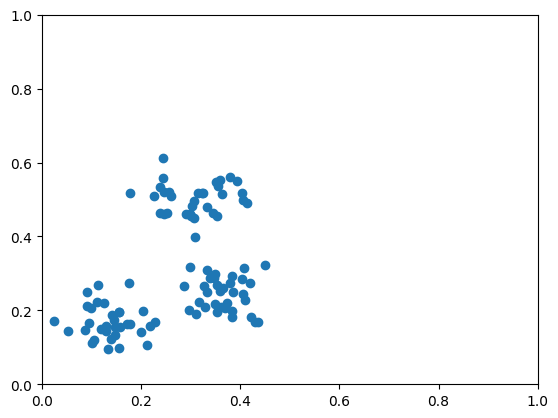

In [151]:
#Dataset Creation
n = 100      # number of data points
k = 3        # Number of centers
std = 2      # std of datapoints

points,o_centers = get_data(n,k,std)       #dataset
print(points,o_centers)
points = preprocess(points)                # Normalize dataset
print(points)
plt.figure()                                  
draw_plot(points,o_centers,label=False)
# centroids = initialize_centers(points,k)   # Intialize centroids
# print(centroids)

[[0.2469024  0.52116812]
 [0.37907705 0.56097312]
 [0.11183634 0.22311366]]
Accuracy: 0.72


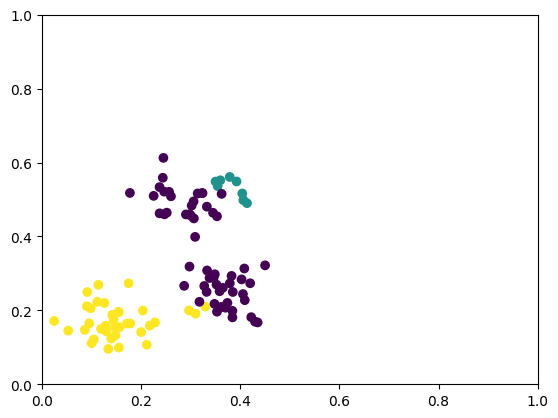

----------------------
Accuracy: 0.81


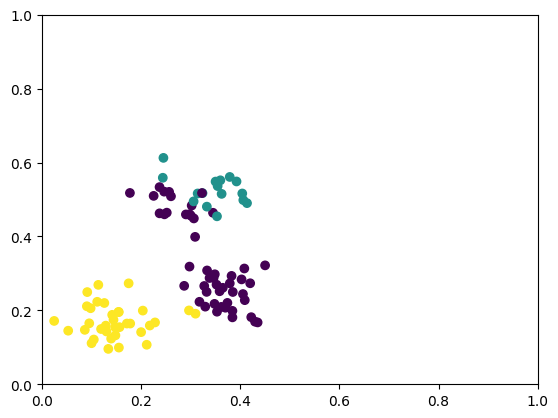

----------------------
Accuracy: 0.86


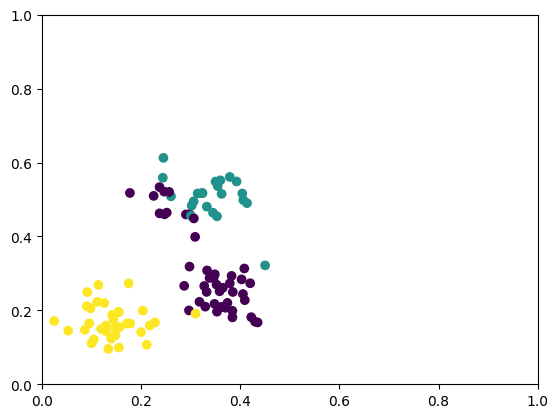

----------------------
Accuracy: 0.91


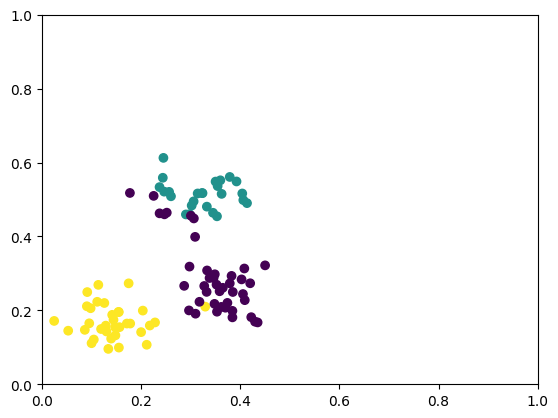

----------------------
Accuracy: 0.91


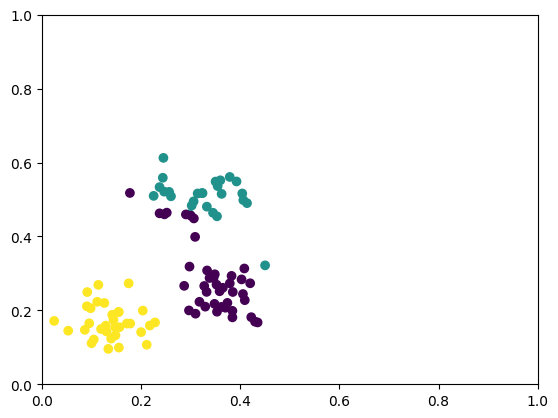

----------------------
Accuracy: 0.91


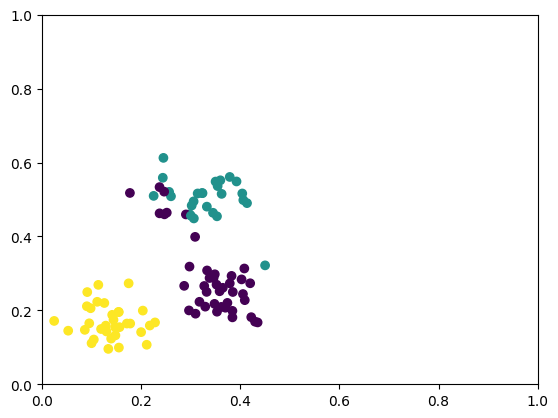

----------------------
Accuracy: 0.89


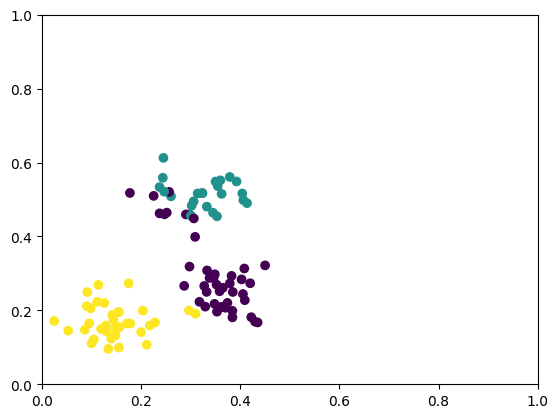

----------------------
Accuracy: 0.94


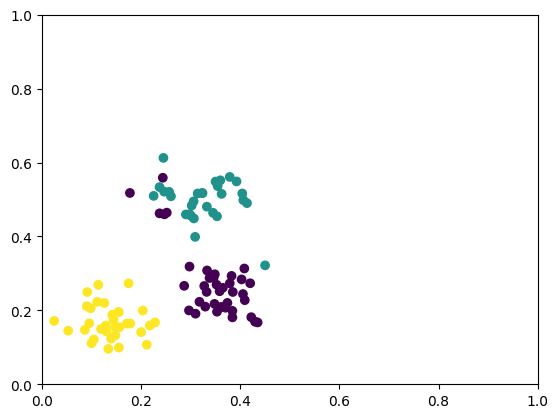

----------------------
Accuracy: 0.91


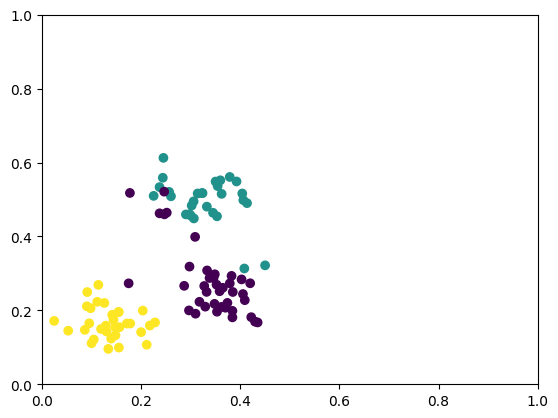

----------------------
Accuracy: 0.93


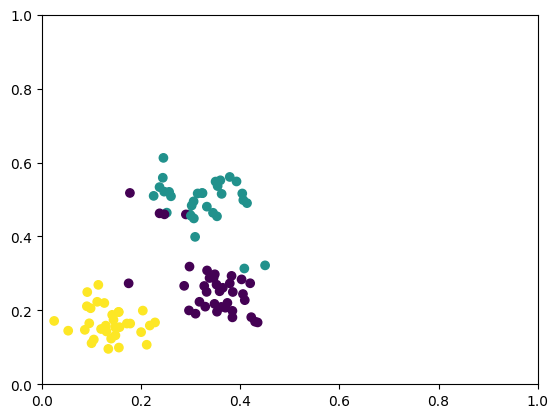

----------------------
Best Accuracy: 0.93
Average Accuracy: 0.8789999999999999


In [162]:
# run quantum k-means algorithm
centroids = initialize_centers(points,k)   # Intialize centroids
print(centroids)
points_q=np.copy(points)
centroids_q=np.copy(centroids)
acc_list,b_acc=[],0
iterations=10
for i in range(10):
    centers = find_nearest_neighbour(points_q,centroids_q)       # find nearest centers
    #print(centers,len(centers))
    acc=0
    for i in range(len(centers)):
        if int(centers[i])==int(o_centers[i]): acc+=1
    #print(acc/n)
#     if iterations==10 and acc/n<0.35:
#         iterations=10
#         continue
    b_acc=max(acc/n,b_acc/n)
    acc_list.append(acc/n)
    print("Accuracy:",acc/n)
    plt.figure()
    draw_plot(points,centers)
    #plot_centroids(centroids)
    centroids_q = find_centroids(points_q,centers)               # find centroids
    print("----------------------")
    #interations-=1
print("Best Accuracy:",b_acc)
print("Average Accuracy:",sum(acc_list)/10)

In [163]:
print(centroids_q)
print(centroids)

[[0.30508751 0.30508751]
 [0.4095452  0.4095452 ]
 [0.15121923 0.15121923]]
[[0.2469024  0.52116812]
 [0.37907705 0.56097312]
 [0.11183634 0.22311366]]


In [164]:
def get_distance(p1, p2):
    return np.sqrt(np.sum((p1-p2)*(p1-p2)))

In [165]:
def find_nearest_neighbour_k(points,centroids):
    
    n = len(points)
    k = centroids.shape[0]
    centers = np.zeros(n)
    
    for i in range(n):
        min_dis = 10000
        ind = 0
        for j in range(k):
            
            temp_dis = get_distance(points[i,:],centroids[j,:])
            
            if temp_dis < min_dis:
                min_dis = temp_dis
                ind = j
        centers[i] = ind
    
    return centers

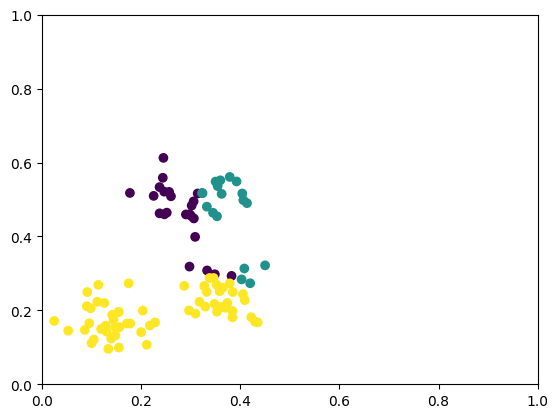

Accuracy: 0.51
-----------------


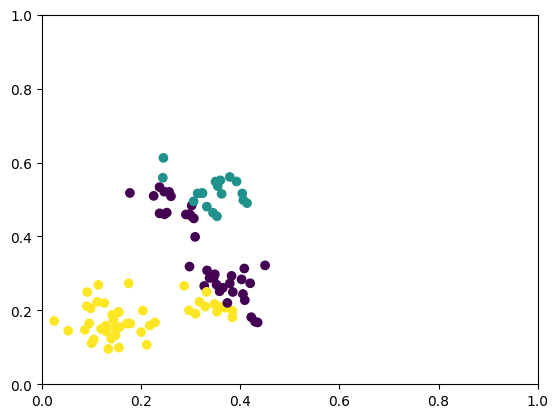

Accuracy: 0.73
-----------------


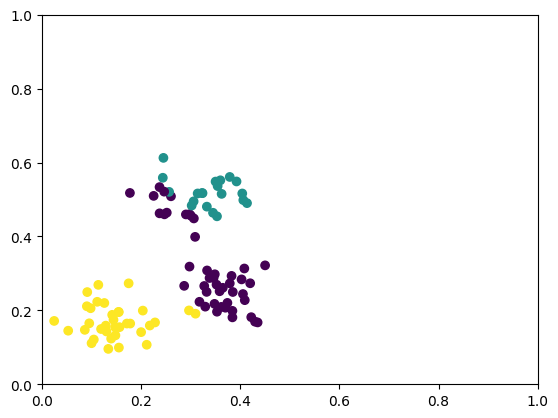

Accuracy: 0.85
-----------------


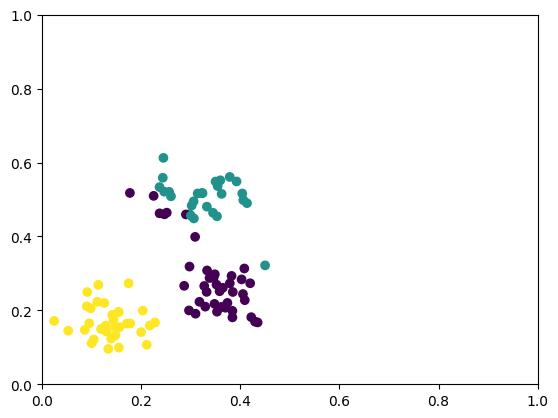

Accuracy: 0.92
-----------------


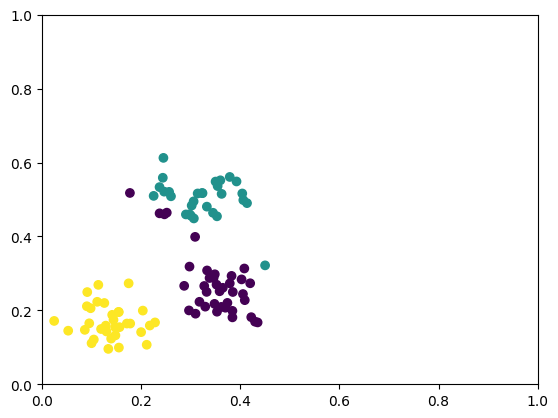

Accuracy: 0.94
-----------------


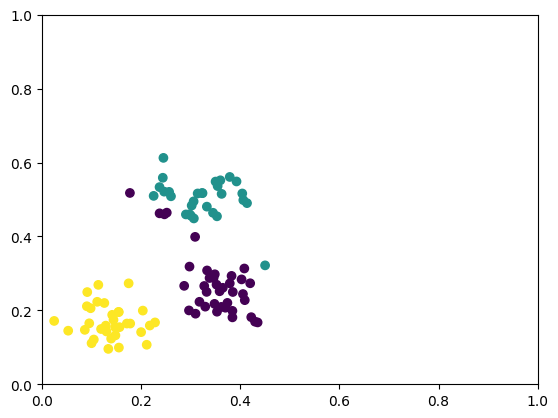

Accuracy: 0.94
-----------------


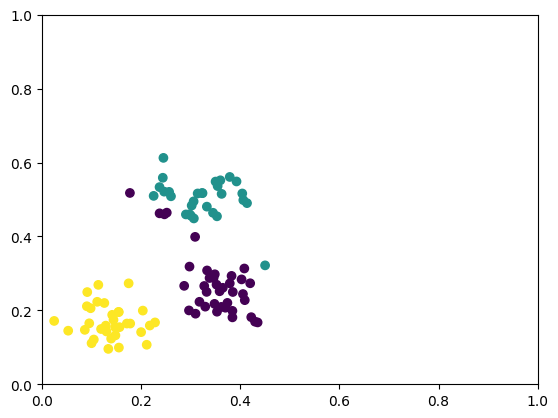

Accuracy: 0.94
-----------------


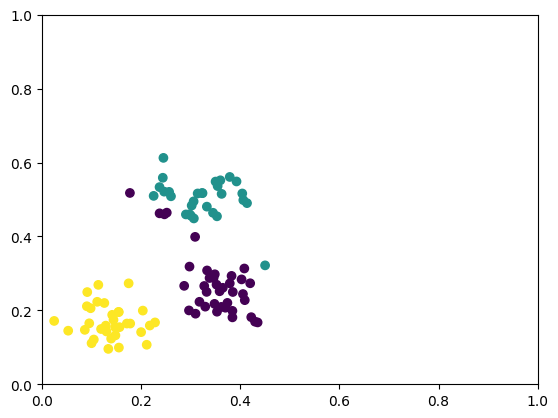

Accuracy: 0.94
-----------------


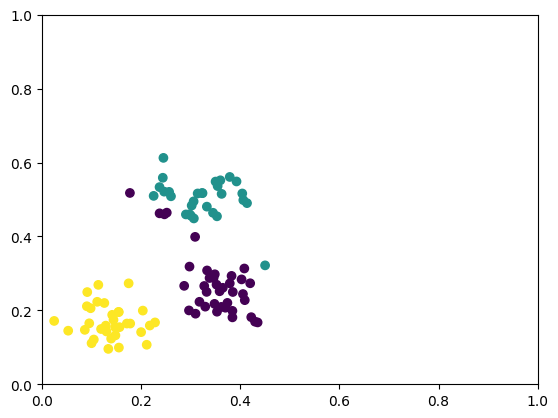

Accuracy: 0.94
-----------------


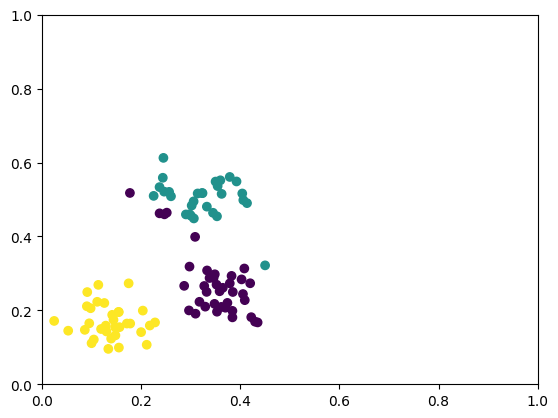

Accuracy: 0.94
-----------------
Best Accuracy: 0.94
Average Accuracy: 0.8649999999999999


In [166]:
# run quantum k-means algorithm
points_k=np.copy(points)
centroids_k=np.copy(centroids)
acc_list,b_acc=[],0
# run k-means algorithm
for i in range(10):
    
    centers = find_nearest_neighbour_k(points_k,centroids_k)       # find nearest centers
    plt.figure()
    draw_plot(points_k,centers)
    #plot_centroids(centroids)
    centroids_k = find_centroids(points_k,centers)               # find centroids
    acc=0
    for i in range(len(centers)):
        if int(centers[i])==int(o_centers[i]): acc+=1
    b_acc=max(acc/n,b_acc/n)
    acc_list.append(acc/n)
    print("Accuracy:",acc/n)
    print("-----------------")
print("Best Accuracy:",b_acc)
print("Average Accuracy:",sum(acc_list)/10)